# FROM Umar Mansyur ~ Ustad Dev

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [127]:
dataFrame = pd.read_csv('../Dataset/penjualan_beras.csv', sep=';');
dataFrame.head()

,X (Harga per Kilogram),Total Harga
0,10000,50000
1,12000,36000
2,15000,30000
3,11000,44000
4,13000,26000


In [128]:
x = dataFrame.iloc[:, :-1].values
y = np.log1p(dataFrame.iloc[:, 1].values)


In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [138]:
y_pred = regressor.predict(x_test)
y_pred = np.expm1(y_pred)
y_pred

array([135932.05845605, 134927.20922287, 143178.68849962, 145319.23029715,
       134927.20922287, 146184.38071447, 151934.78360613, 132939.74009406,
       141069.67651166, 130981.54604095, 141909.52760746, 135932.05845605,
       136944.39109087, 136944.39109087, 146184.38071447, 148590.19443635,
       136944.39109087, 151934.78360613, 145319.23029715, 140026.84879391,
       132939.74009406, 138991.72990463, 138991.72990463, 141909.52760746,
       142120.27046776, 138991.72990463, 146184.38071447])

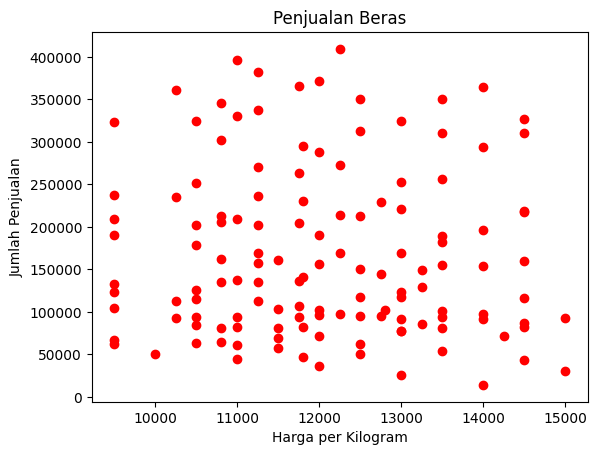

In [133]:
plt.scatter(dataFrame['X (Harga per Kilogram)'], dataFrame['Total Harga'], color='red')
plt.xlabel('Harga per Kilogram')
plt.ylabel('Jumlah Penjualan')
plt.title('Penjualan Beras')
plt.show()

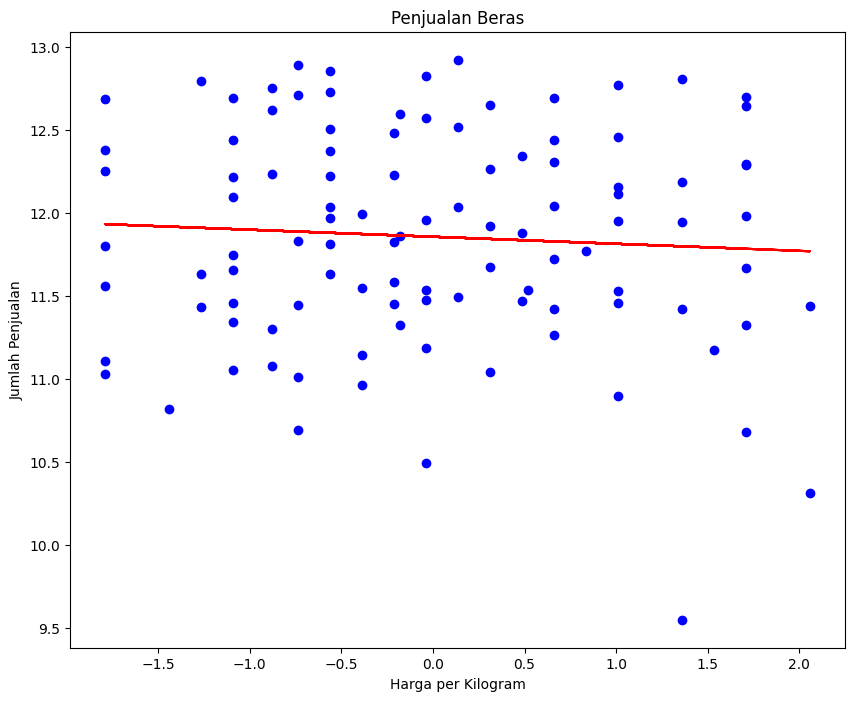

In [134]:
plt.figure(figsize=(10, 8))
plt.scatter(x_train, y_train, color='blue')

plt.plot(x_train, regressor.predict(x_train), color='red')
plt.xlabel('Harga per Kilogram')
plt.ylabel('Jumlah Penjualan')
plt.title('Penjualan Beras')
plt.show()


In [135]:
dataFrame.corr()

,X (Harga per Kilogram),Total Harga
X (Harga per Kilogram),1.000000,-0.056057
Total Harga,-0.056057,1.000000


In [136]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, regressor.predict(x_train)))
print('MSE:', metrics.mean_squared_error(y_train, regressor.predict(x_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(x_train))))

MAE: 0.5387294799379798
MSE: 0.42424988584245094
RMSE: 0.6513446751470767


In [137]:
print('MAE:', metrics.mean_absolute_error(y_test, regressor.predict(x_test)))
print('MSE:', metrics.mean_squared_error(y_test, regressor.predict(x_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regressor.predict(x_test))))


MAE: 0.530164567686016
MSE: 0.4098219278397554
RMSE: 0.6401733576460016
